# Evaluation terminale : Machine learning & python -- Nom Prénom

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Le machine learning permet d'entrainer un ordinateur, en lui fournissant une base de données, pour qu'il puisse ensuite donner des statistiques sur d'autres bases de données similaires, en se basant sur ces "connaissances". Cette technique permet de graduellement améliorer la véracité des résultats. Le machine learning permet d'aider les humains à traiter des volumes de données bien plus importants que si il le faisait manuellement.

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Le machine learning permet de reperer des "paternes". Des exemples de cas d'usages sont :
- Classification de documents
- reconnaissance de texte
- détection du sujet d'un document
- détection d'images, d'objets
- "match making" (matcher des profils entre eux, comme Tinder)

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

- Apprentissage supervisé :
lors de l'apprentissage supervisé, la machine connait déja les résultats que l'on attend d'elle. elle cherche donc à retrouver ces résultats.
    
- Apprentissage non-supervisé :
lors de l'apprentissage non-supervisé, les résultats ne sont pas disponibles dans le jeu de donné, c'est donc à la machine de faire tout le travail.

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

La classification fait parti de l'apprentissage supervisé.
le clustering fait parti de l'apprentissage non-supervisé

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Un arbre de décision est un schéma, qui permet d'évaluer les possibilités, leur coûts et bénéfices.
Pour construire un arbre de décision, on part du noeud "raçine", puis on dessine ensuite les possibilités en dessous. Chaque possibilité est representé par un "noeud" (une case).

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

L'overfitting, c'est lorsque l'on base l'apprentissage sur un unique jeux de données, en ne le séparant pas assez. Cela aura pour conséquence que l'algorithme ne fonctionnera pas avec d'autres jeux de données, car il sera adapté uniquement au jeu initial. il est nécessaire de diviser le jeu en plusieurs "sets" (train et test)

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [2]:
# packages
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


Importez les données comme suit :

In [3]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [4]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

La variable 'Name' n'est pas nécessaire, car elle ne reflète pas les capacités du joueur.

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [5]:
data.drop(labels=['Name', '3P%'], axis=1, inplace=True)
data = data.dropna()

#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

Oui, il contient des valeurs nulles,

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [6]:
# code..

#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [7]:
# Valeur recherchée
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

# séparation en test & train
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.25, random_state=42)

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Cette étape est indispensable pour ne pas faire d'overfitting, et que notre modèle soit performant pour tous les dataset

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [8]:
classifier = DecisionTreeClassifier(
    criterion="entropy", max_depth=5, min_samples_split=0.1)

classifier = classifier.fit(xTrain, yTrain)
estimate = classifier.predict(xTest)

#### Exercice 2.5: Evaluez la qualité du modèle. 

In [9]:
# Grâce au score de précision, on évalue la qualitée du modèle.
# U
accuracy_score(yTest, estimate, normalize=True, sample_weight=None)

0.6955223880597015

#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

On utilise la AUC pour déterminer la qualité du modele.

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Le résultat obtenu (0.69) est relativement bien, pour être correct un résultat doit être au dessus de 0.50.

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

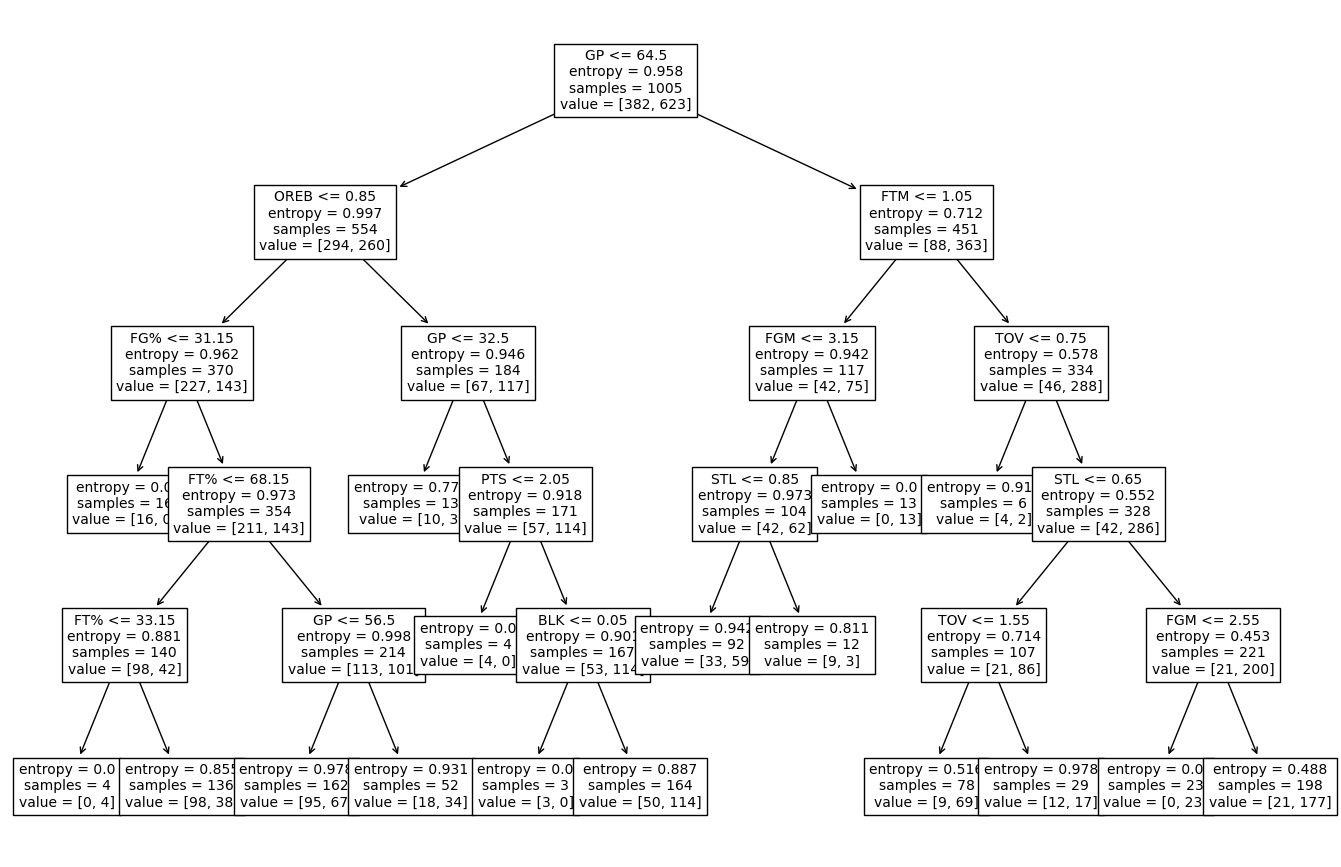

In [10]:
plt.figure(figsize=(17,11))
plot_tree(classifier, feature_names=list(xTrain.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

On peut voir que les facteurs qui influent le plus sur l'entropie sont 'FieldGoalsMade', 'Blocks' et 'FT%'.
lorsque elles sont respectivements en dessous de 2.55, 0.05 et 33.15, l'entropie est à zéro

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

Pour améliorer la qualité du modèle, plusieurs options sont possibles: 
- lui fournir plus de données d'entrainement
- 'optimiser' les HyperParametres
- utiliser des données 'significatives'

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

In [11]:
print("Accuracy (closer to 1 is better)")

best_accuracy = 0
best_args = [
    0,
    0
]

for max_depth in range(2, 20):
    for min_sample in range(1, 10):
        min_sample = min_sample / 100
        classifier = DecisionTreeClassifier(
            criterion="entropy",
            max_depth=max_depth,
            min_samples_split=min_sample,
            random_state=2
        )
        classifier = classifier.fit(xTrain, yTrain)
        estimate = classifier.predict(xTest)

        # print("Max depth: " + str(max_depth))
        # print("Min sampltes: " + str(min_sample))
        accuracy = accuracy_score(
            yTest, estimate, normalize=True, sample_weight=None)
        # print("Accuracy: " + str(accuracy))

        if (accuracy > best_accuracy):
            best_accuracy = accuracy
            best_args[0] = max_depth
            best_args[1] = min_sample

print("best accuracy: ", best_accuracy)
print("max depth: ", best_args[0])
print("min sample: ", best_args[1])

Accuracy (closer to 1 is better)
best accuracy:  0.7074626865671642
max depth:  9
min sample:  0.08


#### Question 2.8: Concluez

Grace au script, on modifie les valeurs de max_depth et min_sample, et on stocke le meilleur résultat.
Grâce au script, la précision à augmenté de un peu plus de 1%, passant a 0.70